<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Setup and installations

## Essential installations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
import sys

## cehcking python type

In [4]:
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


## checking device we are using

In [6]:
device_name =tf.test.gpu_device_name()
if device_name:
  print(f'you are using gpu called {device_name}')
else:
  print('you are using cpu')

you are using cpu


## Importing our data set

In [7]:
def read_csv (path = str):
  """
  this function will get data set path as `str` and print the shape of the data set
  """
  try:
    dataframe = pd.read_csv(path)
    print(f"data set is successfully imported from{path}\n")
    print("your data set shape is\n")
    print(dataframe.shape)
    return dataframe
  except Exception as e:
    print(f"we couldnt import data successfully due to{e}")
    return None

In [9]:
df = read_csv("/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv")

data set is successfully imported from/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv

your data set shape is

(8124, 23)


In [10]:
df.head(10)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   
5            c         b          n  ...                        s   
6            c         b          g  ...                        s   
7            c         b          n  ...                        s   
8            c         n          p  ...                        s   
9            c         b          g  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   
5                      w                      w         p          w   
6                      w                      w         p          w   
7                      w                      w         p          w   
8                      w                      w         p          w   
9                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  
5           o         p                 k          n       g  
6           o         p                 k          n       m  
7           o         p                 n          s       m  
8           o         p                 k          v       g  
9           o         p                 k          s       m  

[10 rows x 23 columns]

In [11]:
df.tail(15)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8109     e         b           s         w       f    n               f   
8110     e         x           s         n       f    n               a   
8111     e         k           s         w       f    n               f   
8112     e         k           s         n       f    n               a   
8113     p         k           y         e       f    y               f   
8114     p         f           y         c       f    m               a   
8115     e         x           s         n       f    n               a   
8116     p         k           y         n       f    s               f   
8117     p         k           s         e       f    y               f   
8118     p         k           y         n       f    f               f   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8109            w         b          w  ...                        s   
8110            c         b          o  ...                        s   
8111            w         b          p  ...                        s   
8112            c         b          o  ...                        s   
8113            c         n          b  ...                        k   
8114            c         b          y  ...                        y   
8115            c         b          y  ...                        s   
8116            c         n          b  ...                        k   
8117            c         n          b  ...                        s   
8118            c         n          b  ...                        s   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8109                      w                      w         p          w   
8110                      o                      o         p          o   
8111                      w                      w         p          w   
8112                      o                      o         p          n   
8113                      p                      p         p          w   
8114                      c                      c         p          w   
8115                      o                      o         p          o   
8116                      p                      w         p          w   
8117                      p                      w         p          w   
8118                      p                      w         p          w   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8109           t         p                 w          n       g  
8110           o         p                 n          v       l  
8111           t         p                 w          n       g  
8112           o         p                 b          v       l  
8113           o         e                 w          v       d  
8114           n         n                 w          

In [12]:
df.iloc[150:180]

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
150     e         x           y         w       t    a               f   
151     e         x           s         n       f    n               f   
152     e         x           y         w       t    l               f   
153     e         s           f         n       f    n               f   
154     e         x           s         w       t    a               f   
155     e         x           y         n       t    l               f   
156     e         b           y         y       t    a               f   
157     e         x           y         w       t    a               f   
158     e         b           y         w       t    a               f   
159     e         b           s         y       t    a               f   
160     e         b           s         y       t    l               f   
161     e         b           y         y       t    a               f   
162     e         x           f         n       f    n               f   
163     e         f           y         n       t    l               f   
164     e         x           y         w       t    a               f   
165     e         f           y         y       t    l               f   
166     e         b           s         w       t    a               f   
167     e         b           s         w       t    a               f   
168     e         x           y         n       t    l               f   
169     e         b           s         w       t    a               f   
170     e         x           f         g       f    n               f   
171     e         b           s         y       t    l               f   
172     e         x           f         y       t    l               f   
173     e         b           y         y       t    a               f   
174     e         f           y         y       t    l               f   
175     e         b           y         w       t    l               f   
176     e         b           y         w       t    a               f   
177     e         b           y         y       t    a               f   
178     e         x           y         y       t    l               f   
179     e         b           s         y       t    l               f   

    gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
150            c         b          w  ...                        s   
151            w         b          p  ...                        s   
152            c         b          g  ...                        s   
153            c         n          k  ...                        s   
154            w         n          w  ...                        s   
155            c         b          w  ...                        y   
156            c         b          k  ...                        s   
157            c         b          k  ...                        s   
158            c         b          n  ...                        s   
159            c         b          g  ...                        s   
160            c         b          g  ...                        s   
161            c         b          n  ...                        s   
162            c         n          k  ...                        s   
163            c         b          n  ...                        y   
164            c         b          k  ...                        s   
165            c         b          w  ...                        y   
166            c         b          w  ...                        s   
167            c         b          w  ...                        s   
168            c         b          w  ...                        y   
169            c         b          k  ...                        s   
170            c         n          g  ...                        s   
171            c         b          k  ...                        s   
172            w         n          n  ...                        s   
173  

In [14]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## checklist for step 1

- ✅ Installed required libraries so far and dependencies (numpy, pandas, tensorflow for device detection, ...)
- ✅ Verified python version we will use through out this Projects ( we are using python 3.12.11)
- ✅ Checked the device we are using  (CPU)
- ✅ Imported csv file as df
- ✅ Performed a quick check on train data info and head and tail and iloc

# Step 2: Project overview

## Project briefing

**Project Title:**

Mushroom Classification

---
**My enhanced Title:**
Predicting if a mushroom is edible, poisonous or unkown and not recommended (**Binary Classification**)

---
**Where is this data set coming from:**

Kaggle https://www.kaggle.com/datasets/uciml/mushroom-classification/data

---

** Why this data set matters:**

Its a real data set containing 23 species of mushrooms that based on their attributes are getting classified as one of the classes mentioned above which can be used in future to classify unknown and new discivered mushrooms and help people from getting damaged eating poisonous mushrooms

---
** Goal of this problem:**

build a predictive model that answers the question: “what kind if mushroom this is. "

---
** Evaluation metric:**

since its not a competition and there is no metric mentioned on Kaggle we use usual classification metrics like accuracy,precision,F1,recall and roc auc




## Project dictionary

- Target: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Checklist for Step 2

- ✅ Defined project title
- ✅ Defined project definitaion
- ✅ Wrote problem statement
- ✅ Identified target variable
- ✅ Selected evaluation mentrics based on the problem type

# Step 3: Exploritory Data Analysis EDA

In [17]:
pd.set_option('display.max_columns', None)
df.shape

(8124, 23)

In [18]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

In [19]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

we only have object data type

## Missing values

In [29]:
def plot_missing_data(dataset, title):
  """
  this function will get dataset and title for ploting as str and visualize the missing data as heatmap
  """
  plt.figure(figsize=(10, 5))
  plt.title(title)
  sns.heatmap(dataset.isnull(),cbar=False, cmap='viridis')
  plt.show()



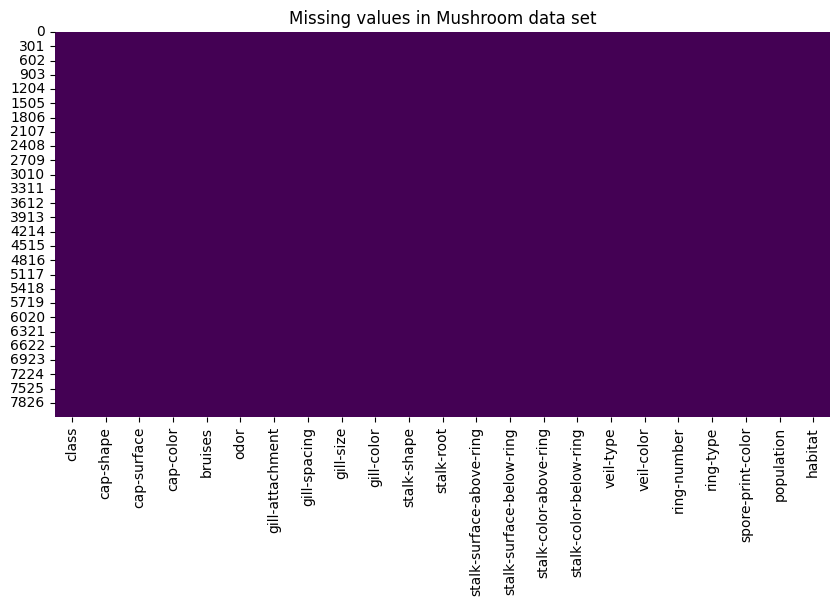

In [30]:
plot_missing_data(df,"Missing values in Mushroom data set")

it seems we dont have any missing value and therefore we can not detect any pattern for missing values, but just to double check we will try in another way

In [25]:
print(df.isnull().sum())
print(df.isna().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                 

No missing values

## Duplicated rows

In [35]:
duplicates = df[df.duplicated(keep=False)]
display(duplicates)


Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

we dont have any duplicated row

## Target count

In [26]:
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

we have like 4208 edible mushrooms and 3916 poisonous, our data looks balanced but we will check the ratio

In [27]:
def plot_uni_countplot(feature,dataset):
  """
  this function gets feature and the data set for that feature and visualizes the countplot for feature
  """
  ax = sns.countplot(x=dataset[feature],data=dataset, color="darkviolet")
  plt.title(f"countplot of {feature}")
  total=len(dataset)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y),ha="center", va="center")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

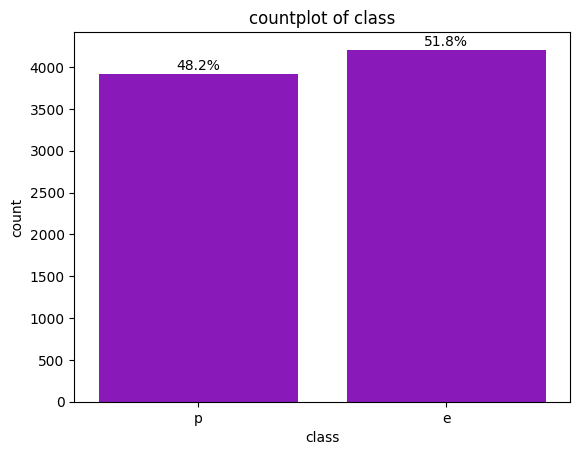

In [28]:
plot_uni_countplot("class",df)

our data looks very balanced so we dont need SMOTE or over/undersampling

## feature counts and distributions

In [32]:
def plot_all_countplots(dataset):
    """
    Plots a countplot for each categorical feature in the dataset,
    one after another, with percentage annotations.
    """
    # Optional: select only categorical features
    categorical_cols = dataset.select_dtypes(include='object').columns

    for feature in categorical_cols:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x=dataset[feature], data=dataset, color="darkviolet")
        plt.title(f"Countplot of {feature}")

        total = len(dataset)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha="center", va="bottom", fontsize=9)

        plt.tight_layout()
        plt.show()

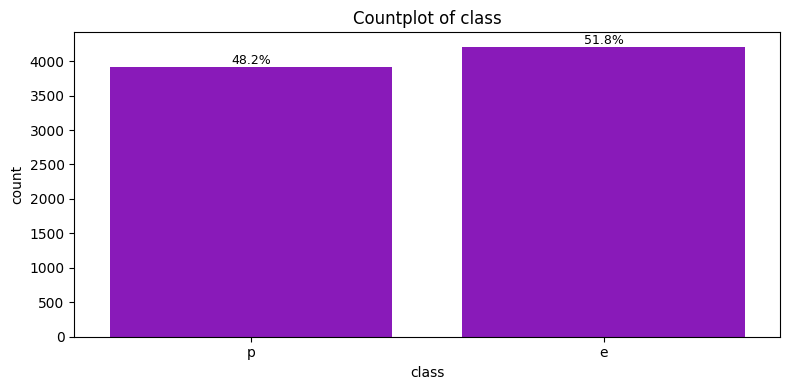

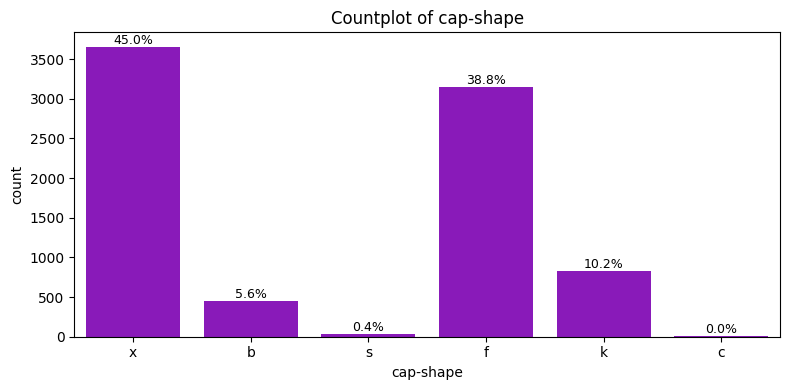

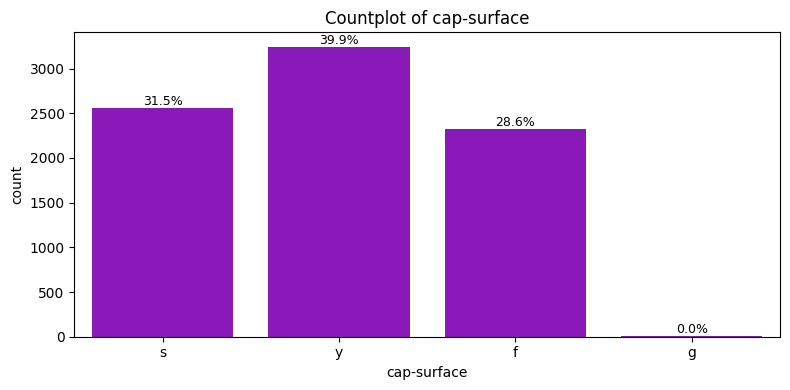

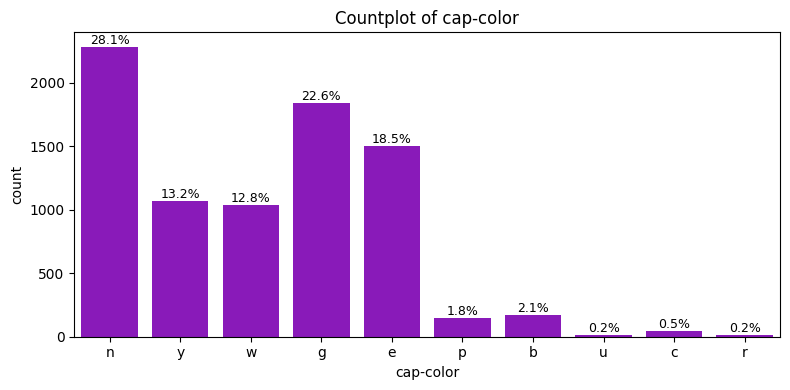

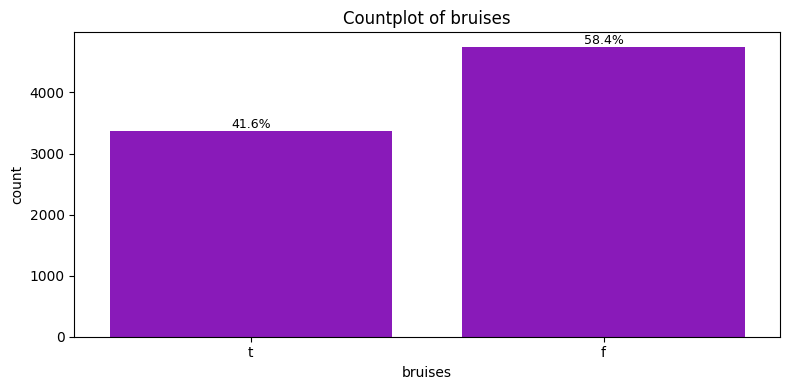

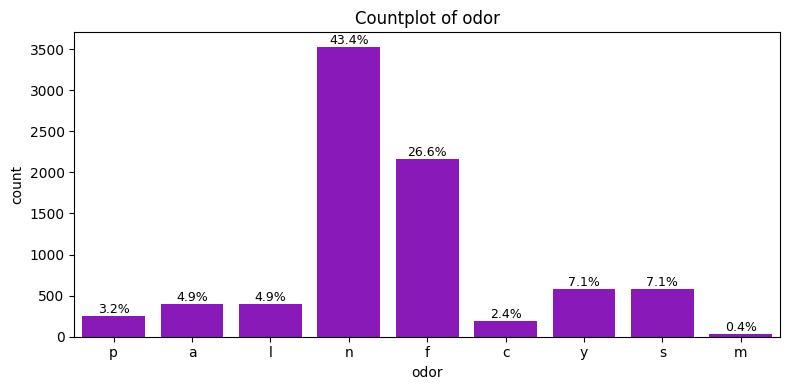

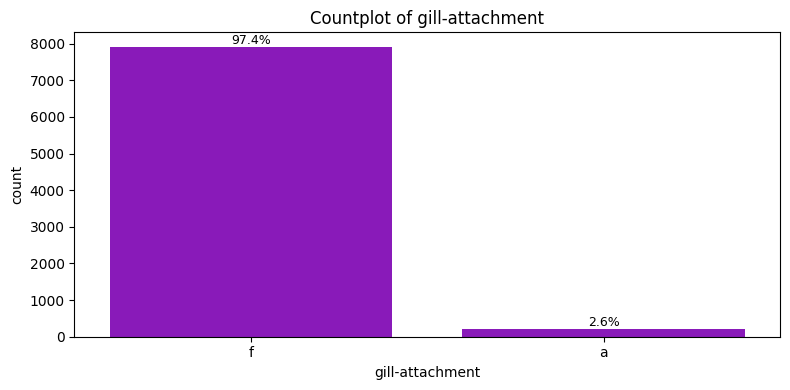

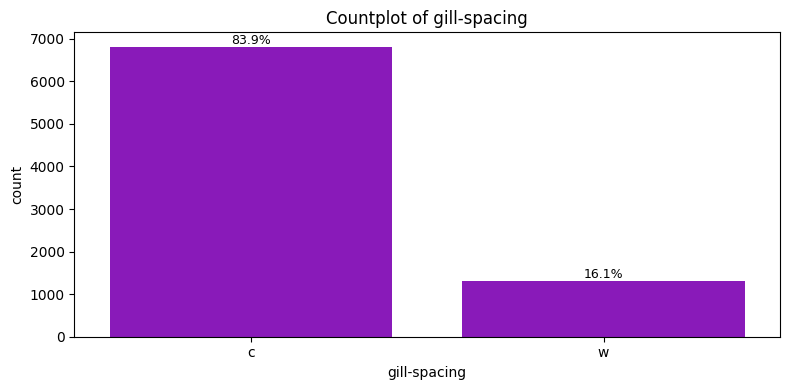

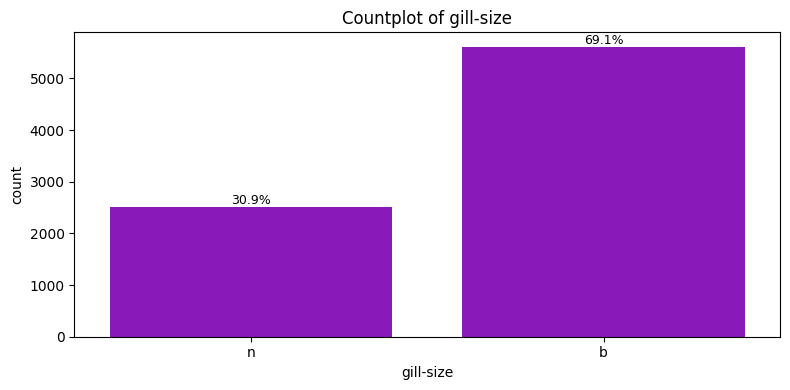

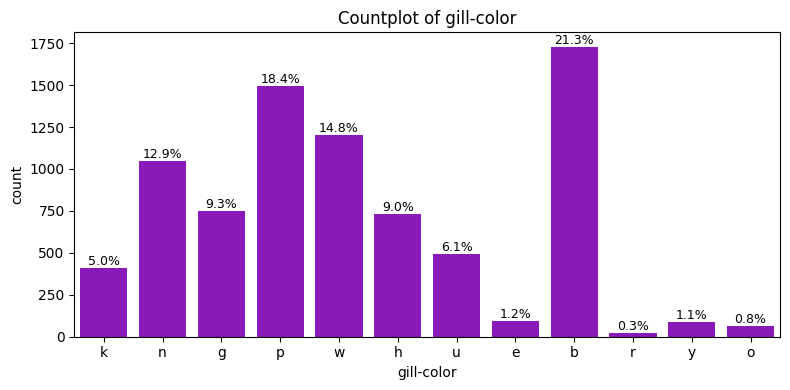

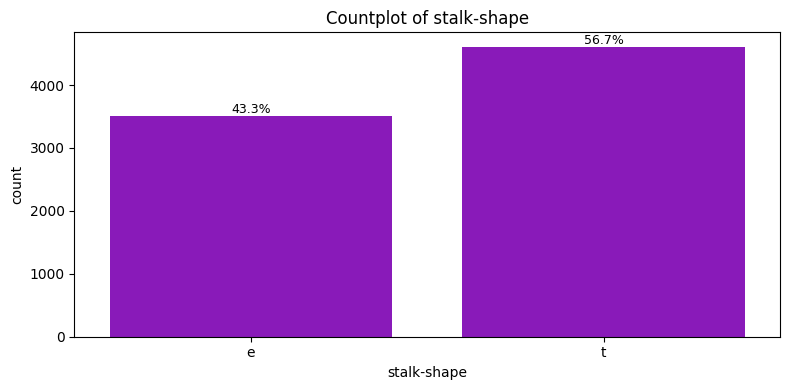

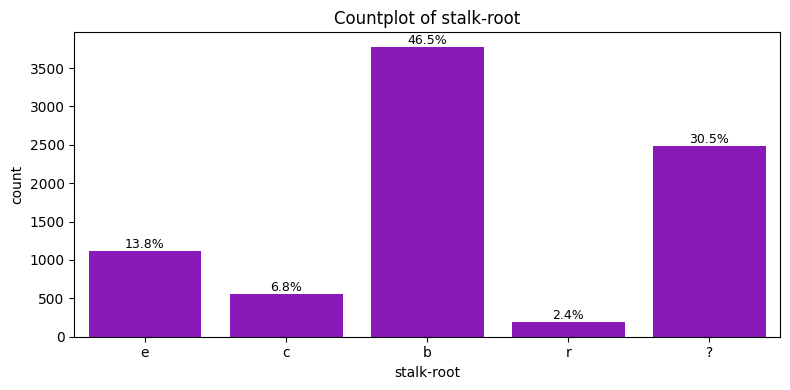

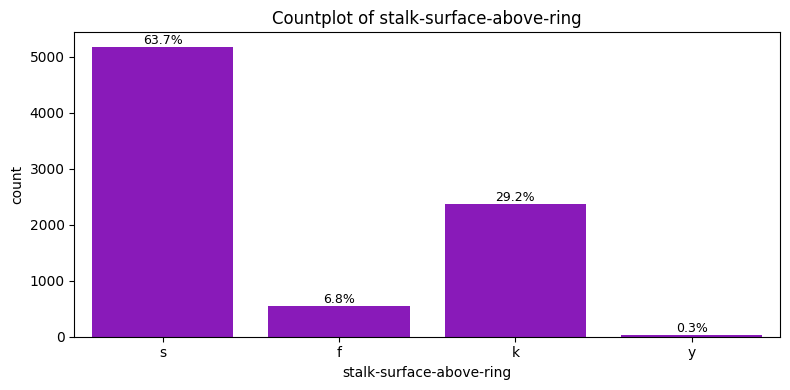

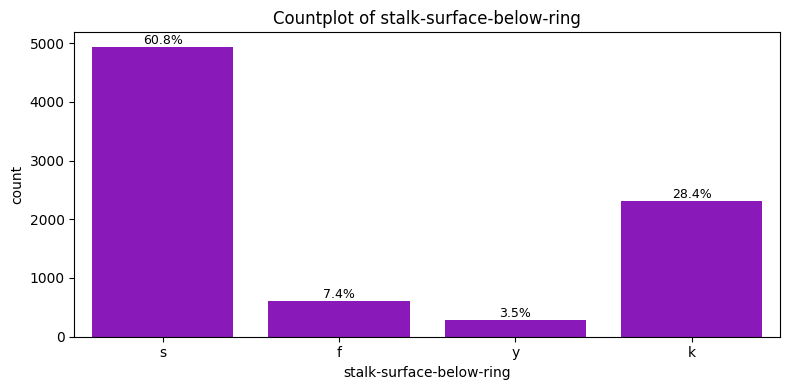

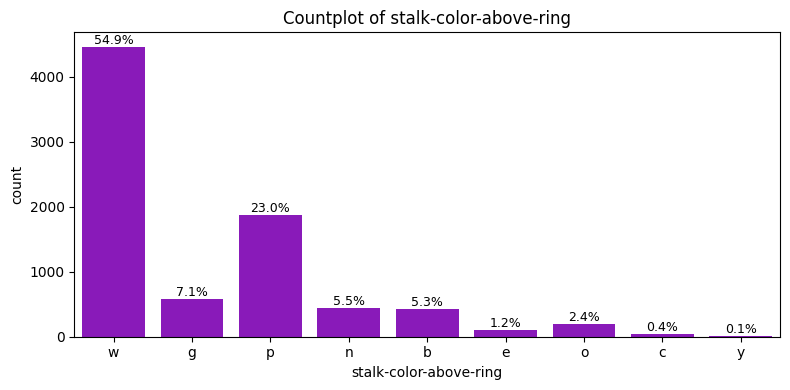

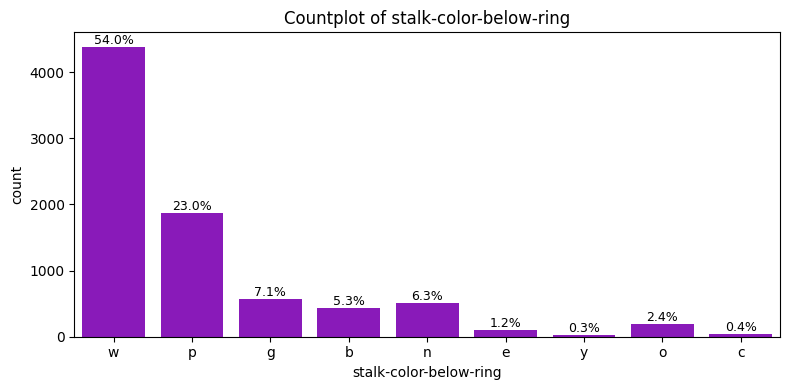

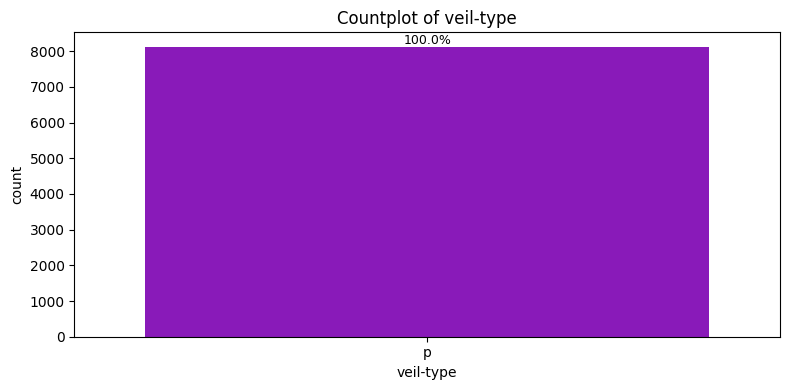

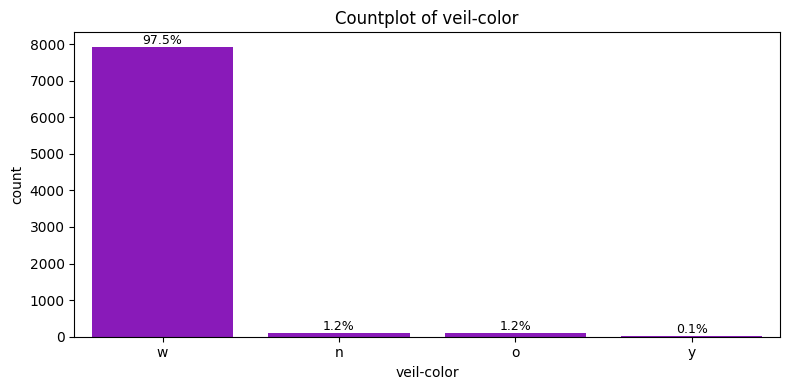

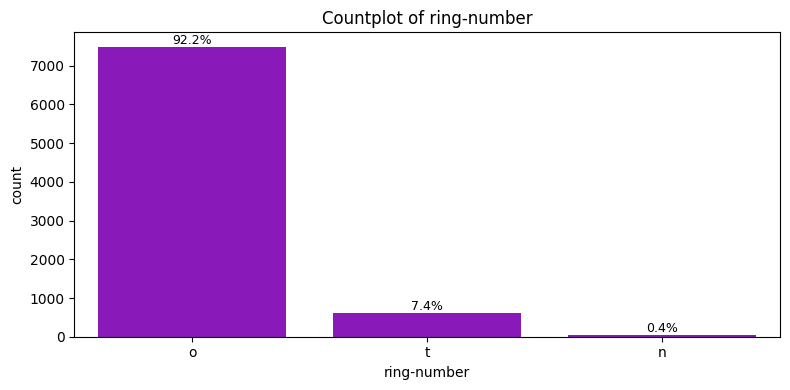

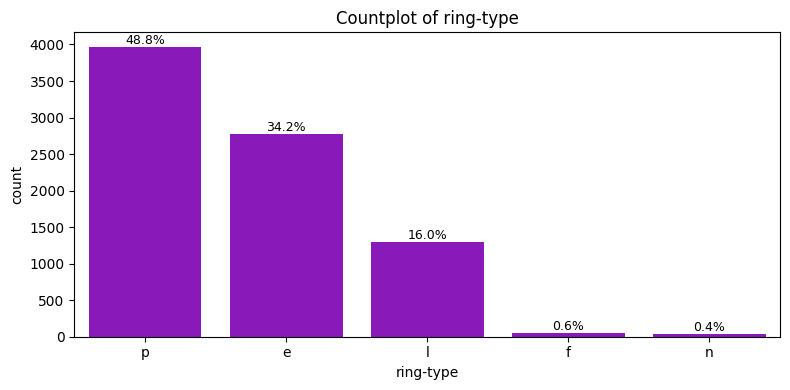

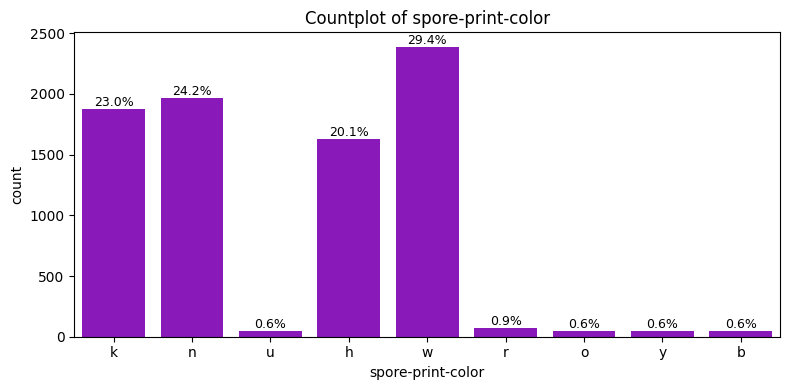

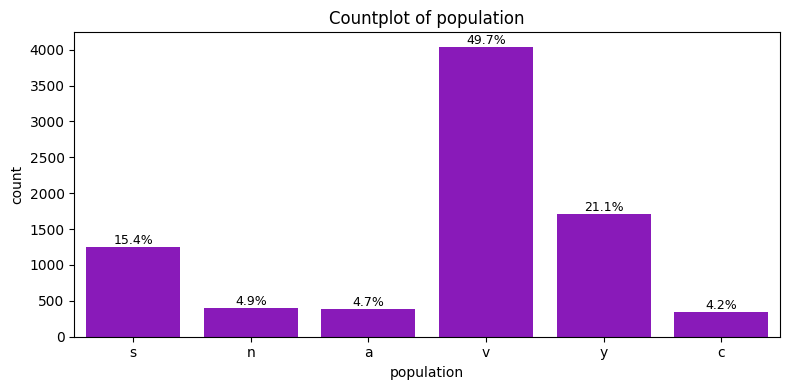

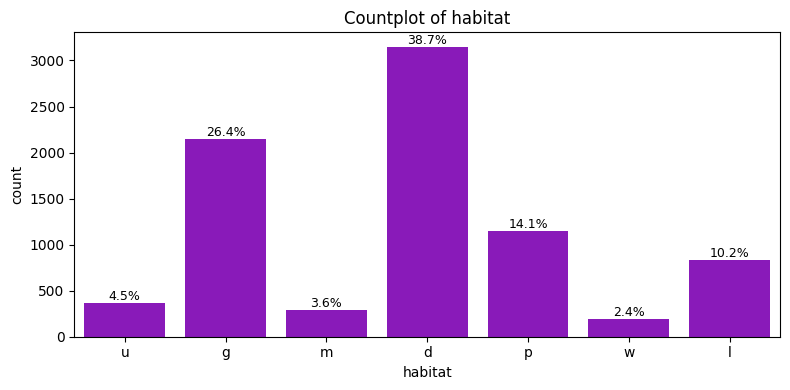

In [34]:
plot_all_countplots(df)


some features have a very small and rare categories, it can be the case we merge them all inside something called others just to avoid noises

some of our features are quasi constant meaning that one category is like 95 percent or more and is dominating that feature and the rest are barly 5 percent all together and usually our models wont learn that much

we will check if rare categories are correlating with target if they dont we drop otherwise we can group them under others to reduce noises

## veil_type

veil_type looks like that we have only one group which doesnt make any sense if thats true for all mushrooms and to avoid sparsing and new dimensions we can drop it later

In [38]:
df['veil-type'].value_counts()

veil-type
p    8124
Name: count, dtype: int64

we have 8124 rows and veil type has 8124 P classes we will drop it later

## Feature vs target swarm plot

In [41]:
def swarm_categorical(df, feature, target_col, figsize=(9,4), point_size=14, alpha=0.6,
                      x_jitter=0.28, y_jitter=0.18, class_order=None, category_order="freq"):
    """
    Categorical swarm: x = feature categories, y = class (separate rows), colored by class.
    Pure matplotlib (no seaborn).

    Parameters
    ----------
    df : DataFrame with categorical `feature` and categorical/binary `target_col`
    feature : str
    target_col : str
    figsize : tuple
    point_size : int
    alpha : float
    x_jitter, y_jitter : float  # jitter ranges
    class_order : list or None  # order of classes on y-axis
    category_order : "freq" | "alpha" | list
        "freq" -> categories sorted by frequency (desc)
        "alpha" -> alphabetical order
        list -> custom order
    """
    d = df[[feature, target_col]].dropna().copy()
    d[feature] = d[feature].astype(str)
    d[target_col] = d[target_col].astype(str)

    # category order
    if isinstance(category_order, list):
        cats = [c for c in category_order if c in d[feature].unique()]
    elif category_order == "alpha":
        cats = sorted(d[feature].unique())
    else:  # "freq"
        cats = d[feature].value_counts().index.tolist()
    xmap = {c:i for i,c in enumerate(cats)}

    # class order
    classes = sorted(d[target_col].unique()) if class_order is None else class_order
    ymap = {c:i for i,c in enumerate(classes)}

    # precompute coords
    xs = d[feature].map(xmap).to_numpy(dtype=float)
    ys = d[target_col].map(ymap).to_numpy(dtype=float)

    # build figure
    plt.figure(figsize=(max(figsize[0], 1.1*len(cats)), figsize[1]))

    # plot per class for legend clarity
    for cls in classes:
        m = (d[target_col] == cls).to_numpy()
        xj = np.random.uniform(-x_jitter, x_jitter, size=m.sum())
        yj = np.random.uniform(-y_jitter, y_jitter, size=m.sum())
        plt.scatter(xs[m] + xj, ys[m] + yj, s=point_size, alpha=alpha, label=str(cls))

    # axes & labels
    plt.xticks(range(len(cats)), cats, rotation=35, ha="right")
    plt.yticks(range(len(classes)), classes)
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.title(f"Swarm plot: {feature} vs {target_col}")
    plt.grid(axis="y", linewidth=0.3)
    plt.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

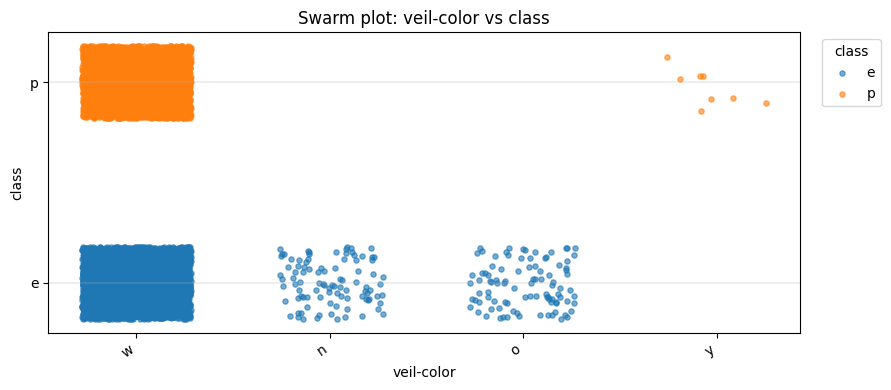

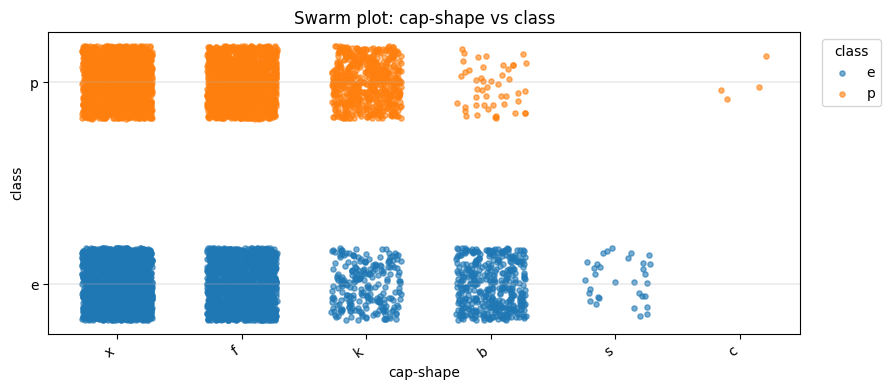

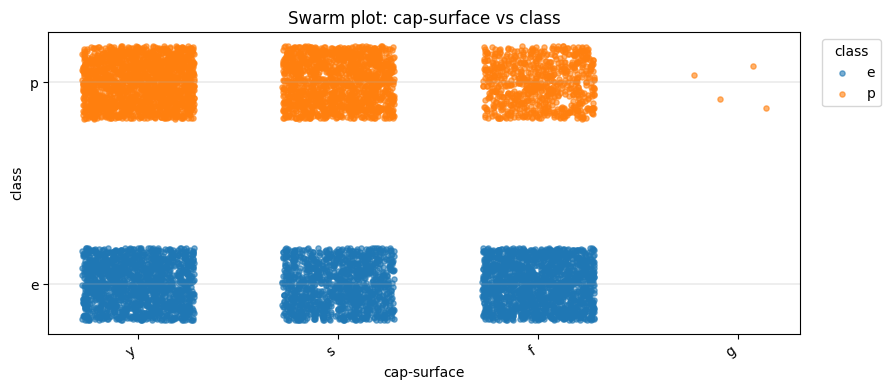

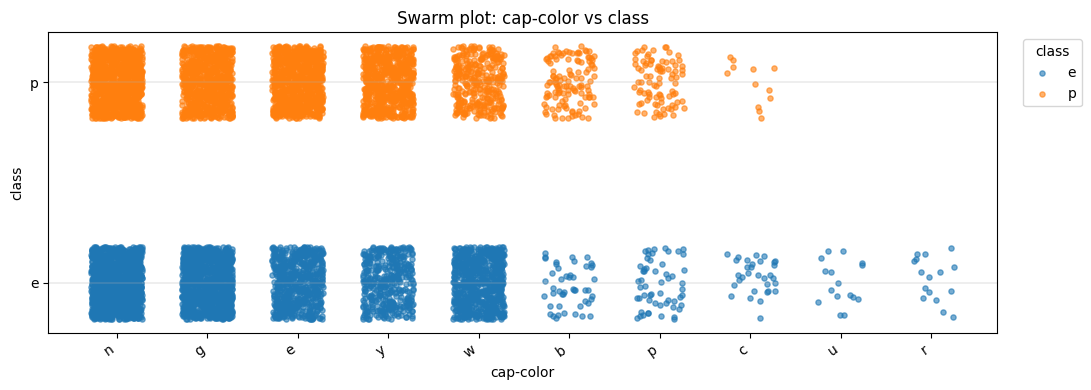

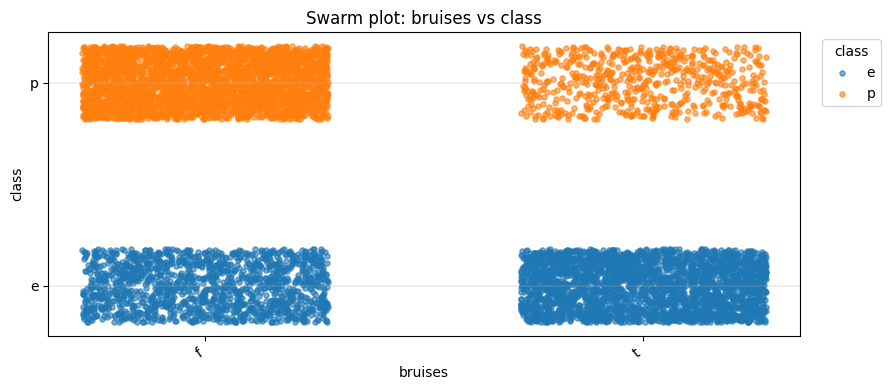

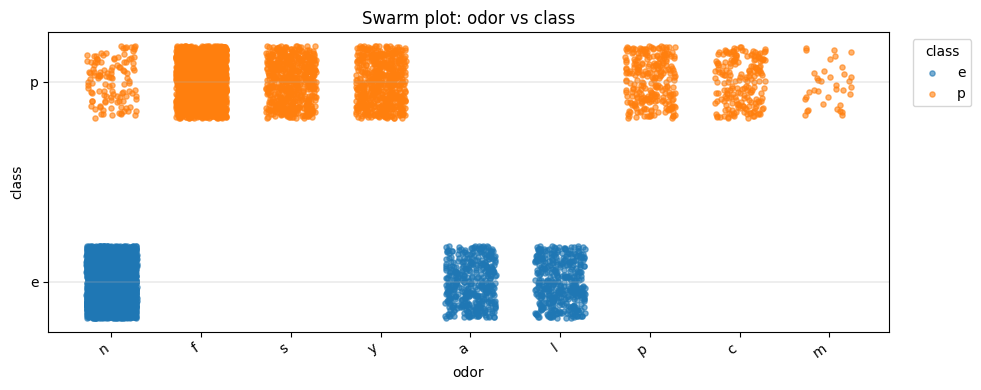

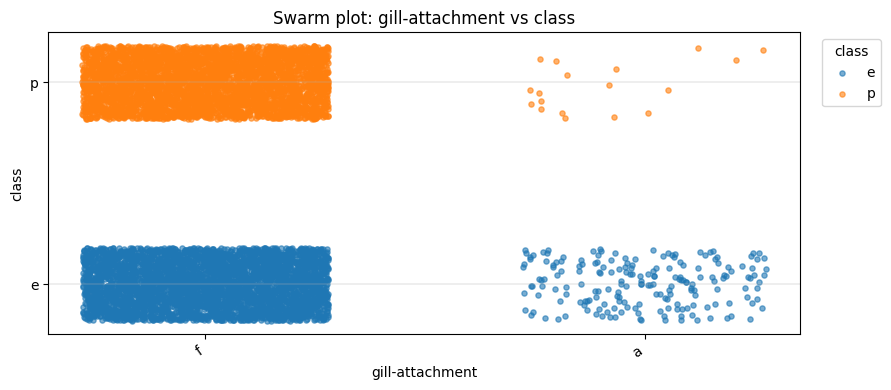

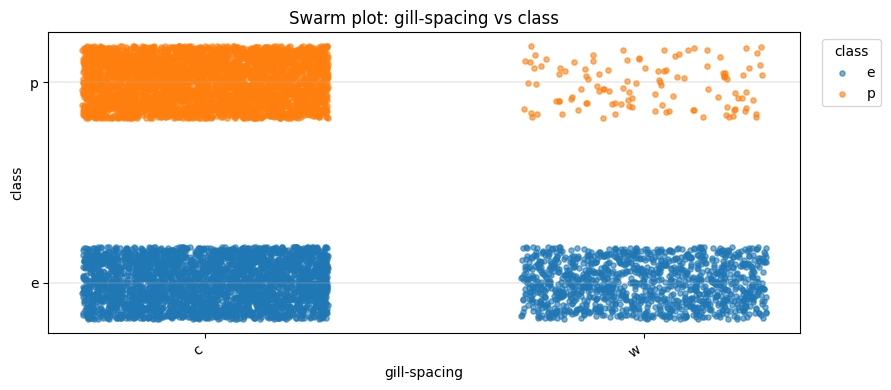

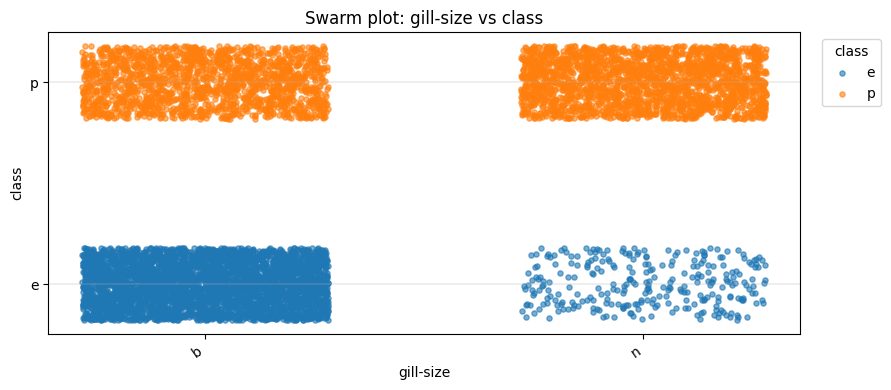

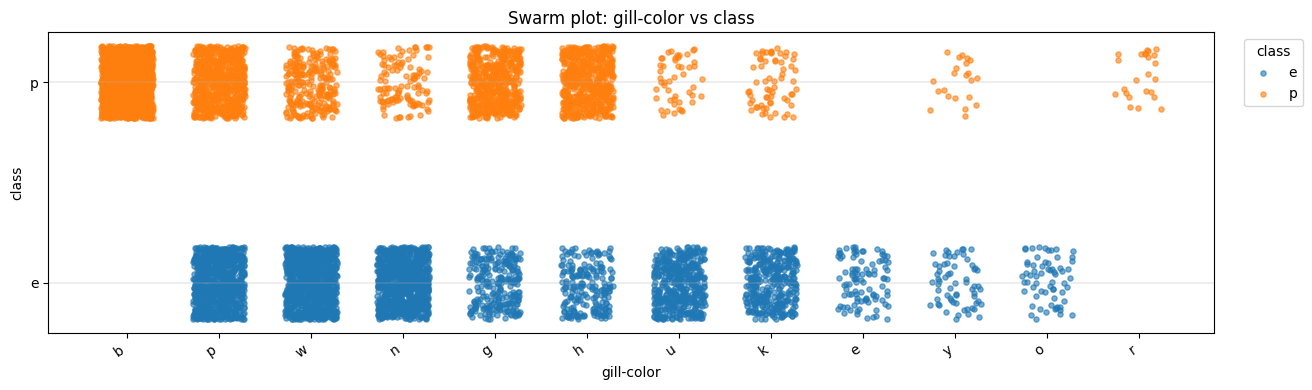

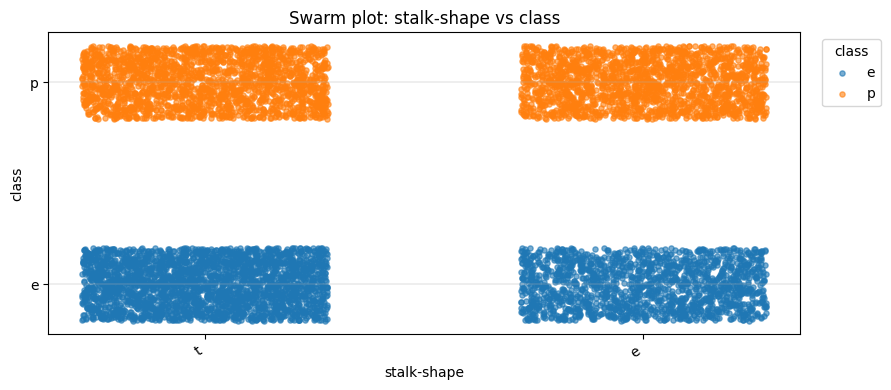

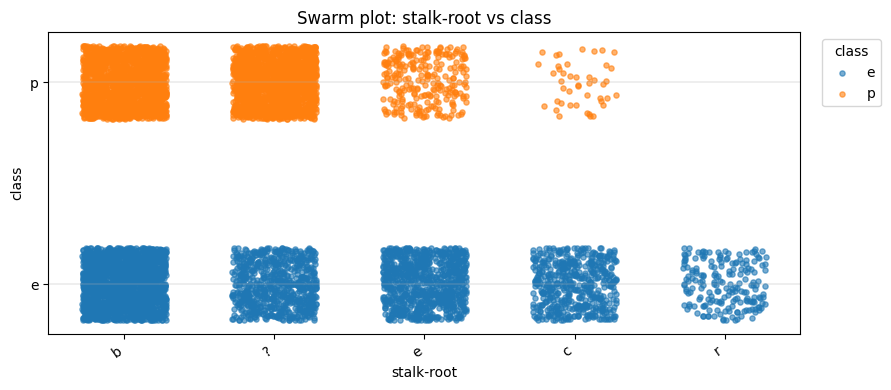

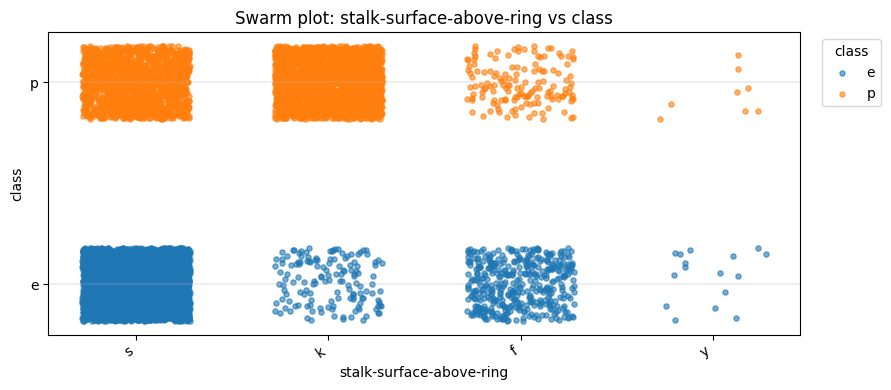

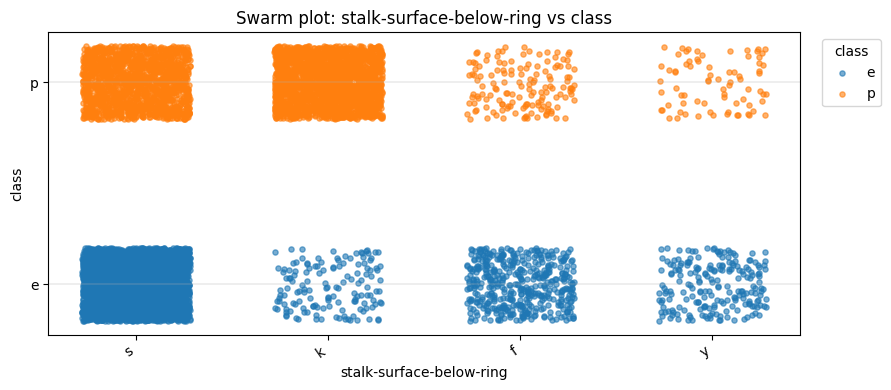

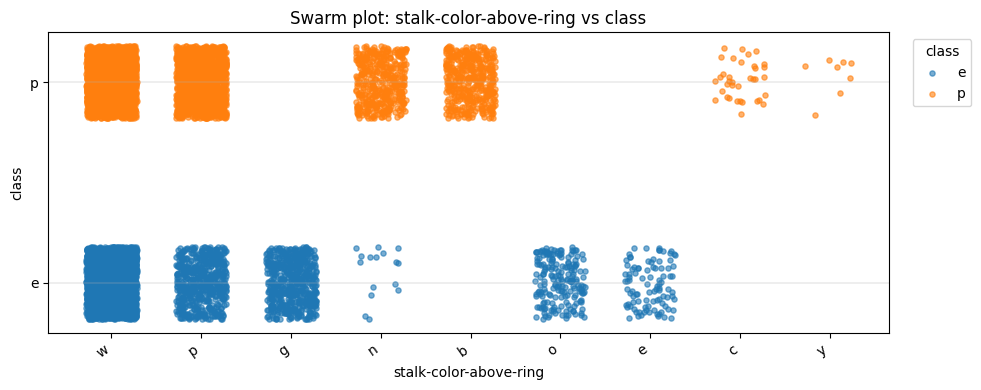

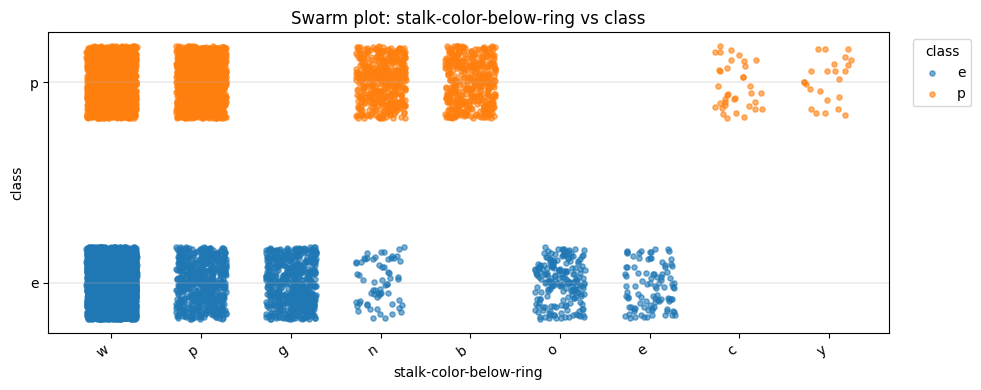

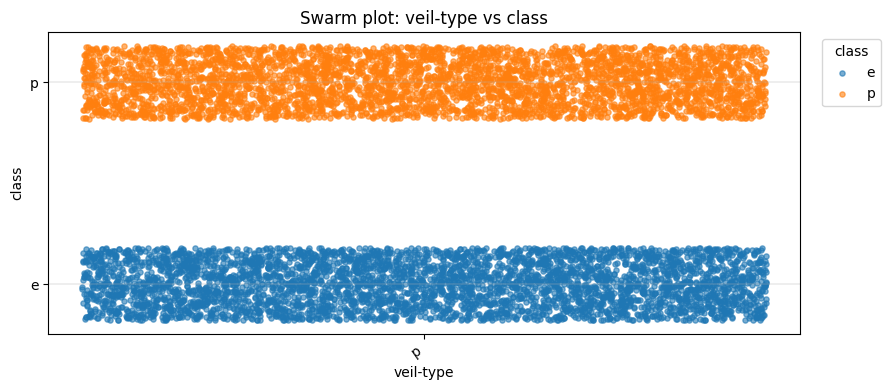

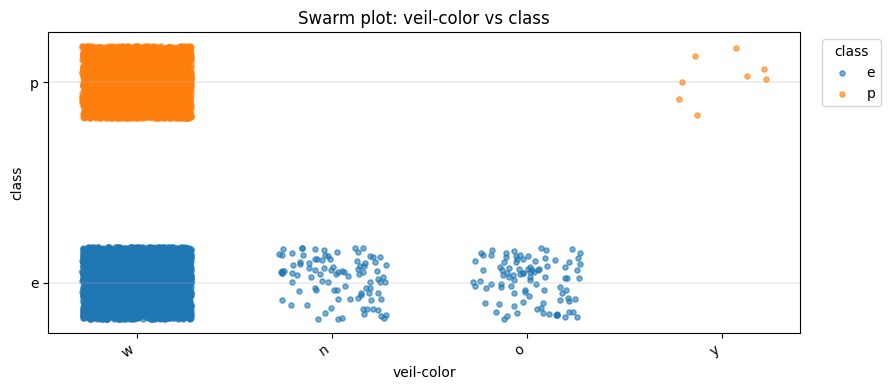

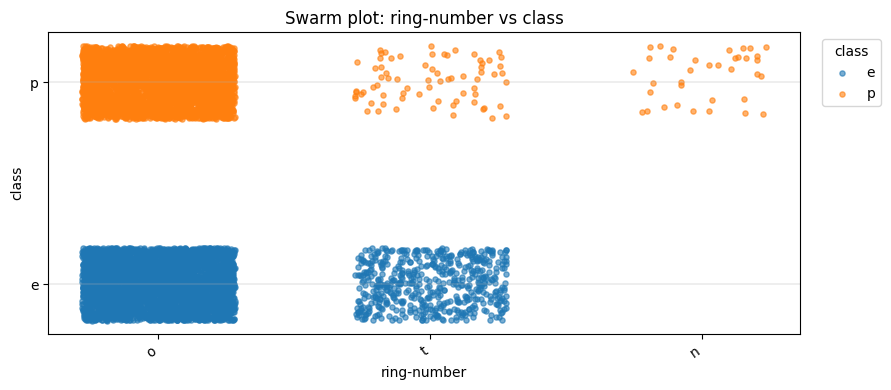

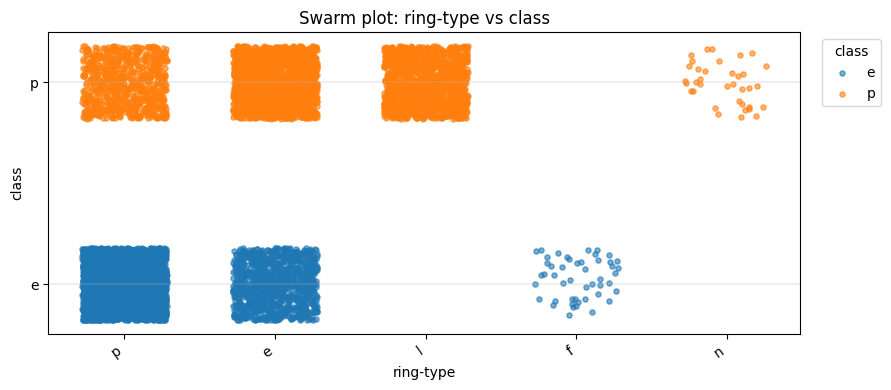

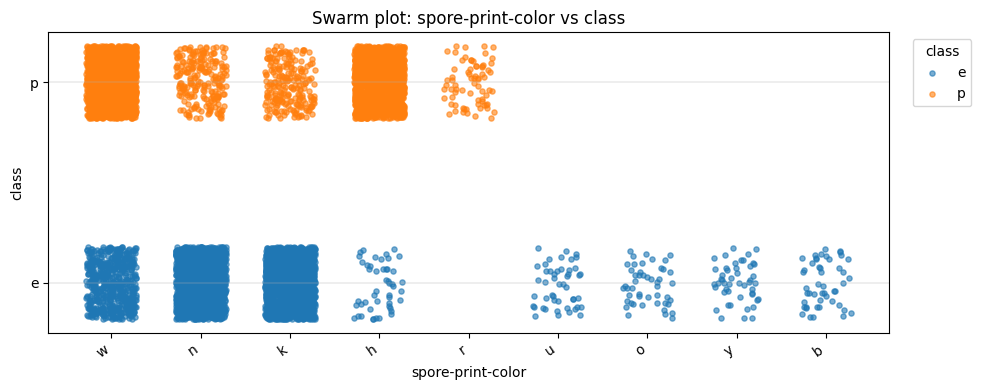

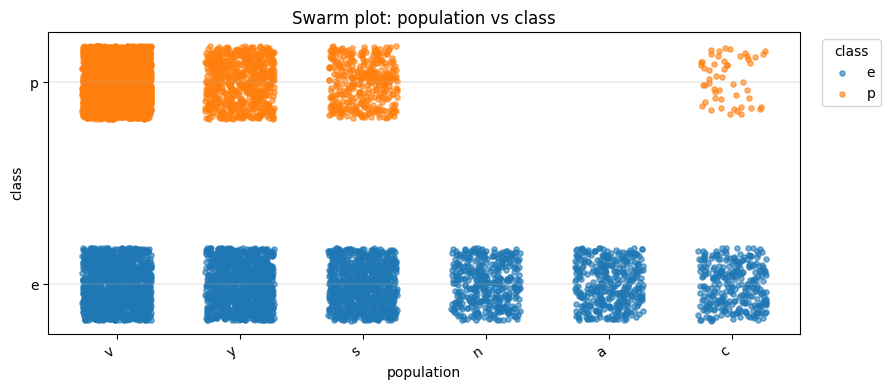

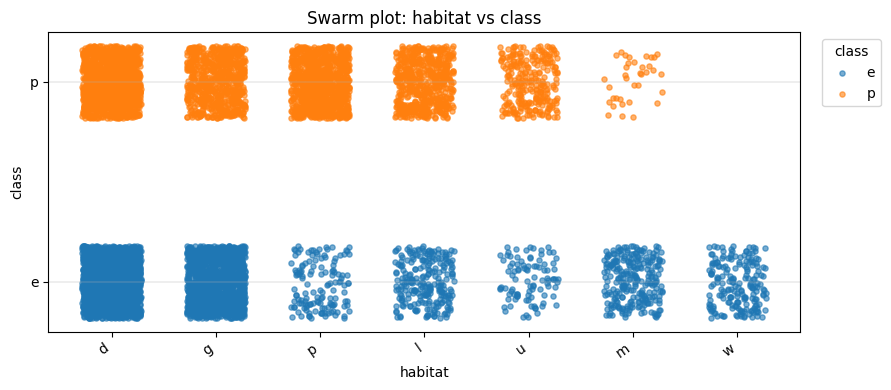

In [42]:
# single feature
swarm_categorical(df, feature='veil-color', target_col='class')

# all categorical features (except target)
for col in [c for c in df.columns if c != 'class']:
    swarm_categorical(df, feature=col, target_col='class')


by looking closly at swarm we see that some of those rare categories are great signals for classification on target feature called `class`
we will merge these 2 views to see how we should merge, drop or put rare categories under others

## Feature vs target countplots

In [47]:
def plot_count_by_class_global_pct(df, target_col, categorical_cols=None, palette="Set2"):
    """
    Side-by-side bar plots for categorical features vs target,
    with bar height = % of all rows (global percentage).
    """
    if categorical_cols is None:
        categorical_cols = [c for c in df.select_dtypes(include="object").columns if c != target_col]

    N = len(df)

    for col in categorical_cols:
        # build crosstab
        ct = pd.crosstab(df[col].astype(str), df[target_col].astype(str))
        pct = (ct / N) * 100
        plot_df = pct.stack().reset_index(name="pct")
        plot_df.columns = [col, target_col, "pct"]

        plt.figure(figsize=(max(6, 0.8*len(ct)), 4))
        ax = sns.barplot(data=plot_df, x=col, y="pct", hue=target_col, palette=palette, dodge=True)

        # labels
        for p in ax.patches:
            h = p.get_height()
            if h > 0:
                ax.annotate(f"{h:.1f}%",
                            (p.get_x() + p.get_width()/2, h),
                            ha="center", va="bottom", fontsize=9)

        plt.title(f"{col} vs {target_col} (global % of dataset)")
        plt.ylabel("Percent of dataset")
        plt.xlabel(col)
        plt.xticks(rotation=30, ha="right")
        plt.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

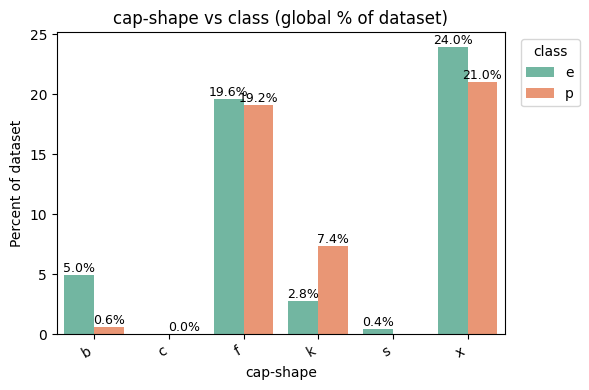

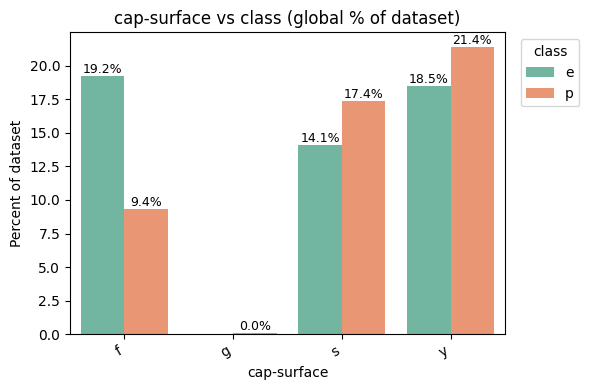

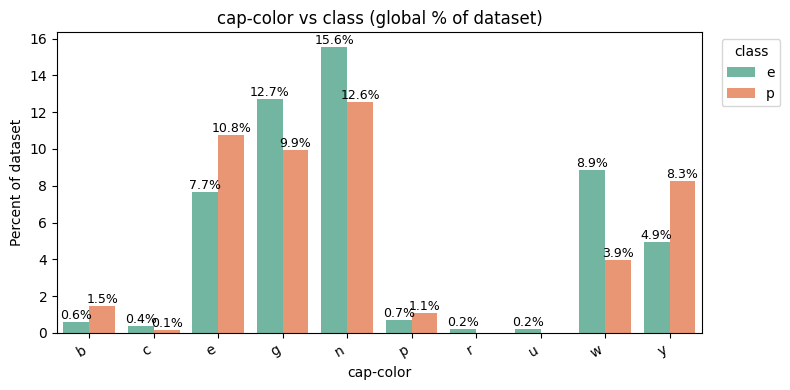

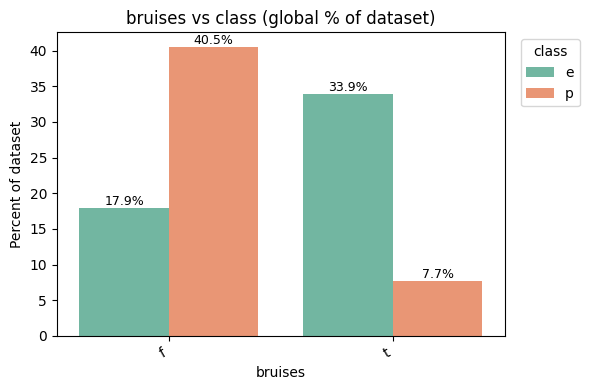

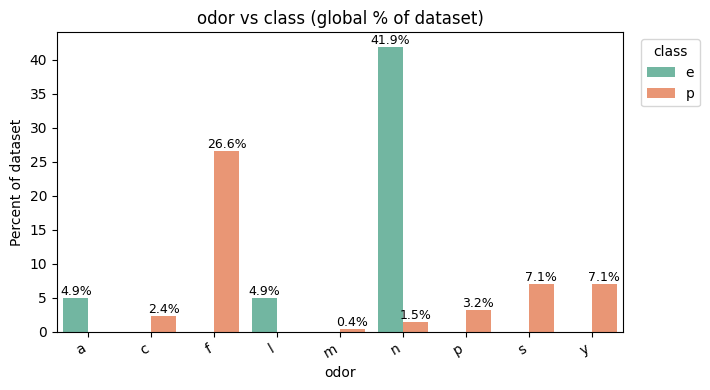

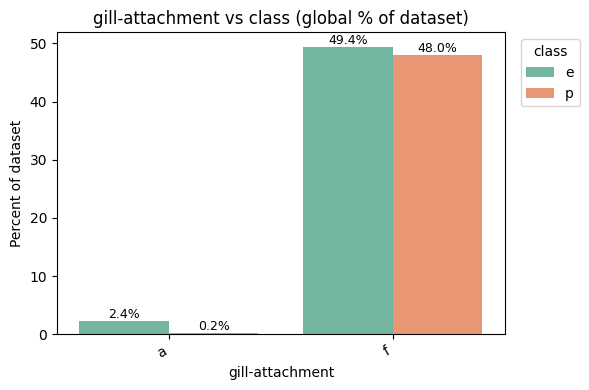

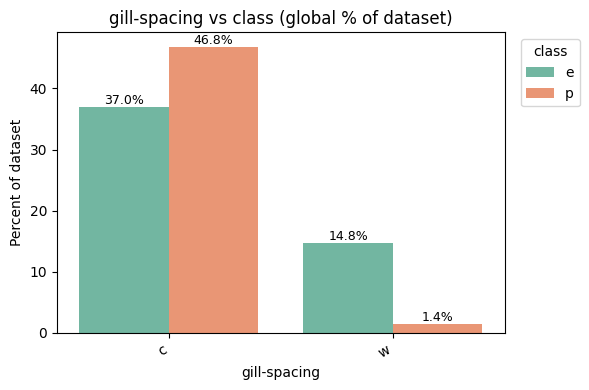

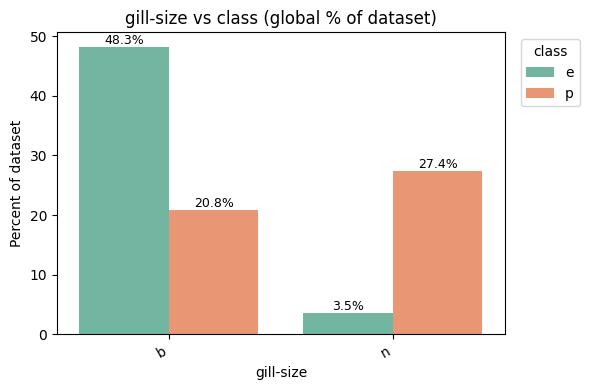

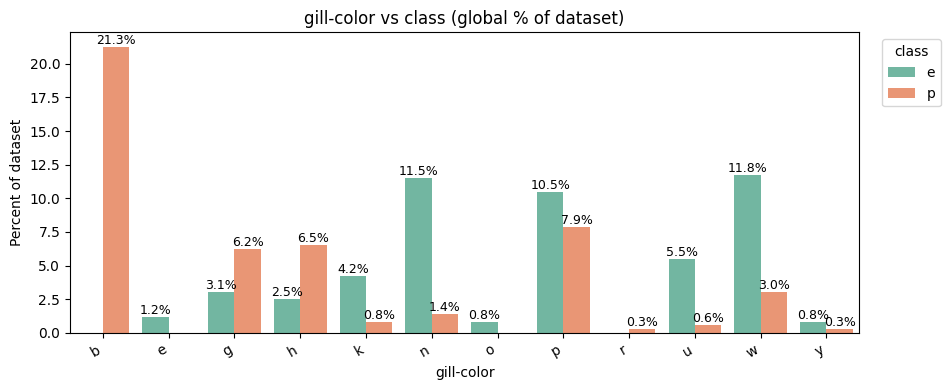

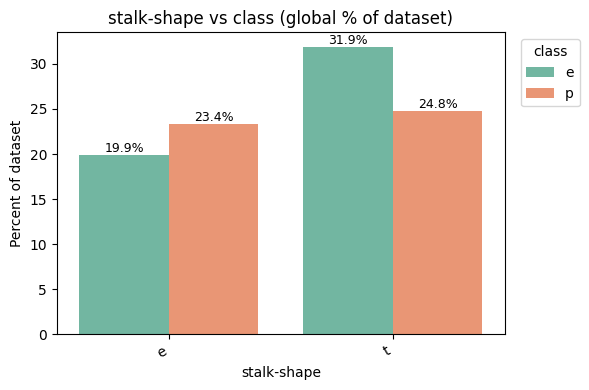

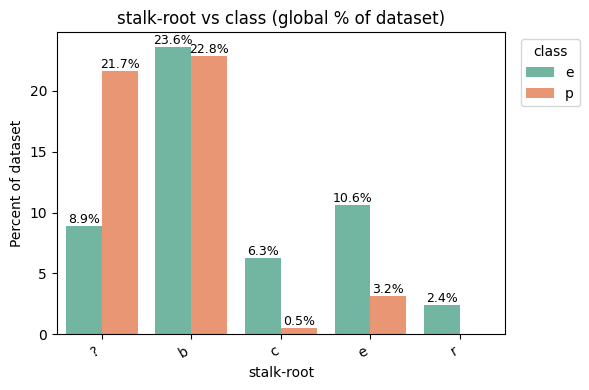

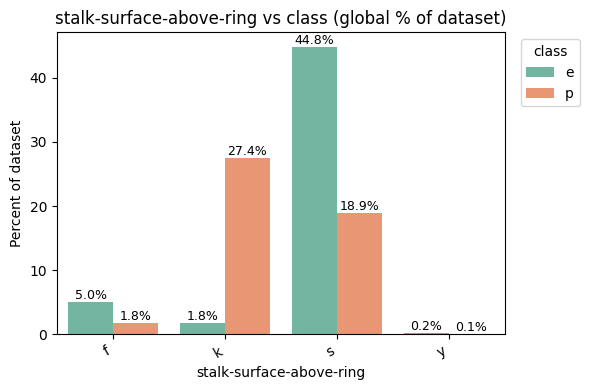

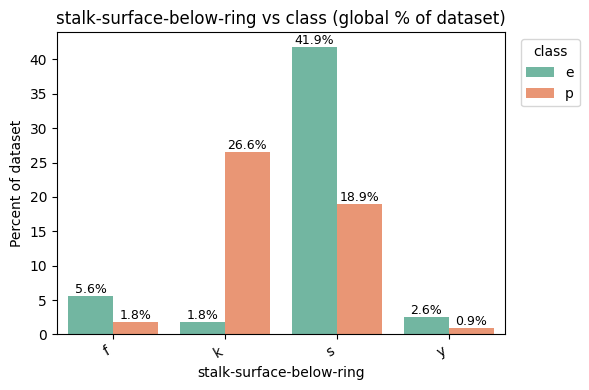

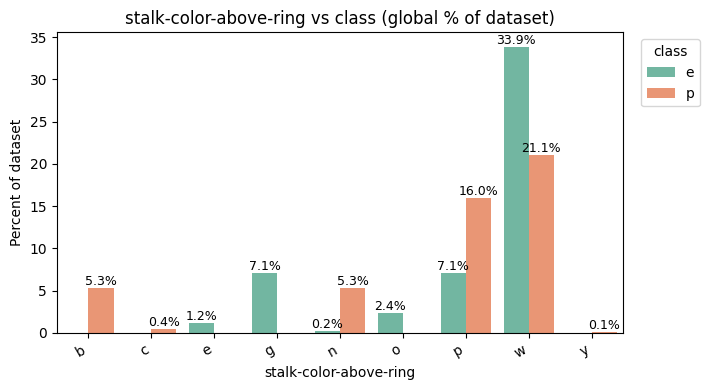

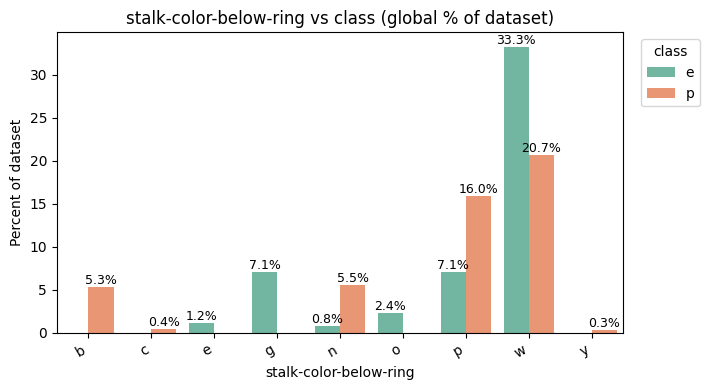

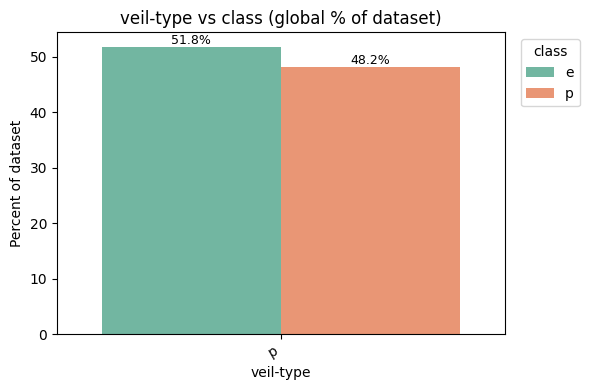

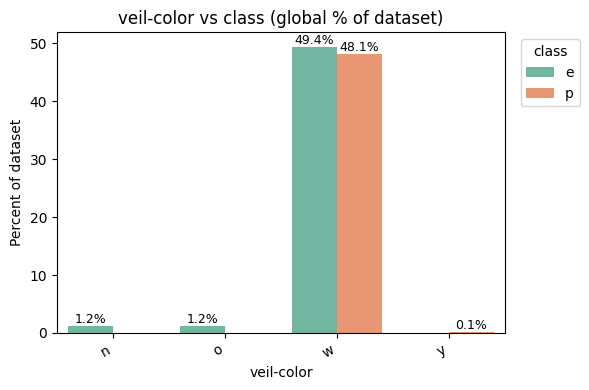

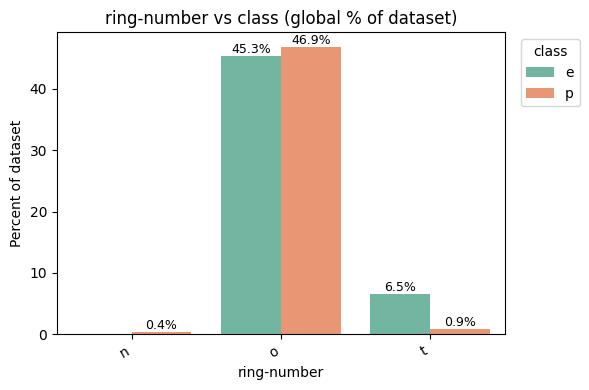

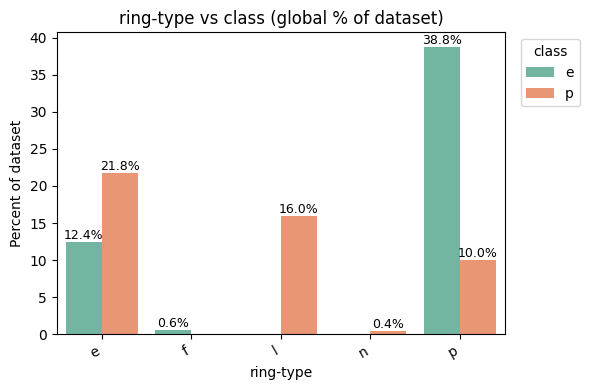

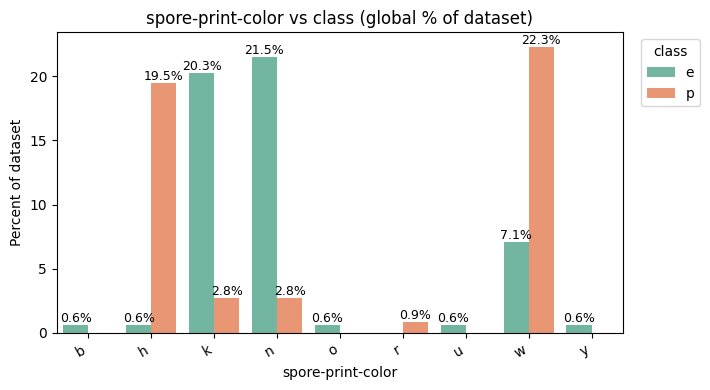

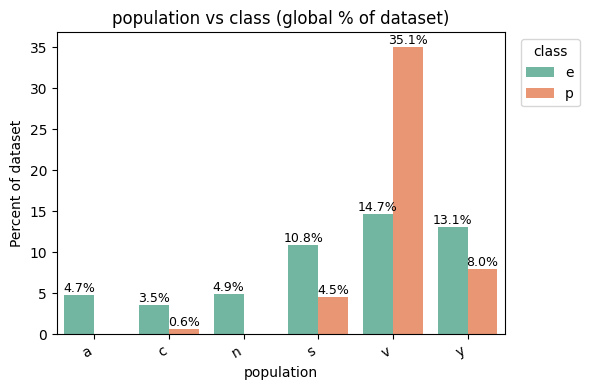

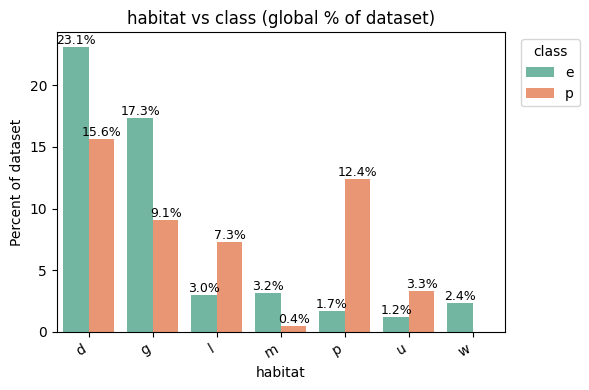

In [48]:
plot_count_by_class_global_pct(df, target_col="class")


In [51]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Cramér's V for two categorical arrays (bias-corrected)."""
    tbl = pd.crosstab(x, y)
    if tbl.size == 0:
        return 0.0
    chi2 = chi2_contingency(tbl)[0]
    n = tbl.values.sum()
    if n == 0:
        return 0.0
    phi2 = chi2 / n
    r, k = tbl.shape
    # bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    denom = max(min((kcorr-1), (rcorr-1)), 1e-12)
    return np.sqrt(phi2corr / denom)

def categorical_corr_matrix(df, cols):
    """Pairwise Cramér's V matrix for given categorical columns."""
    cols = list(cols)
    m = pd.DataFrame(np.eye(len(cols)), index=cols, columns=cols, dtype=float)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            v = cramers_v(df[cols[i]].astype(str), df[cols[j]].astype(str))
            m.iat[i, j] = m.iat[j, i] = v
    return m

def plot_categorical_corr(
    df,
    target_col=None,              # e.g. "class"; if given, it will be included
    cols=None,                    # list of categorical columns; defaults to object dtype
    show_upper=False              # mask upper triangle if False
):
    # pick columns
    if cols is None:
        cols = df.select_dtypes(include="object").columns.tolist()
    if target_col and target_col not in cols:
        cols = [target_col] + cols

    # build matrix
    corr = categorical_corr_matrix(df, cols)

    # dynamic sizing so annotations are readable
    n = corr.shape[0]
    cell = 0.6  # inches per cell; bump if you want even larger cells
    fig_w = max(6, cell * n)
    fig_h = max(4.5, cell * n)

    # annotation font size scales with n
    annot_size = max(7, 14 - 0.3*n)

    # optional mask
    mask = None
    if not show_upper:
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    plt.figure(figsize=(fig_w, fig_h))
    ax = sns.heatmap(
        corr,
        vmin=0, vmax=1, cmap="coolwarm",
        square=True, linewidths=0.5, linecolor="white",
        mask=mask,
        annot=corr.round(3), fmt=".3f",
        annot_kws={"size": annot_size},
        cbar_kws={"shrink": 0.8, "label": "Cramér's V"}
    )
    ax.set_title("Cramér's V Correlation (categorical features)", pad=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return corr

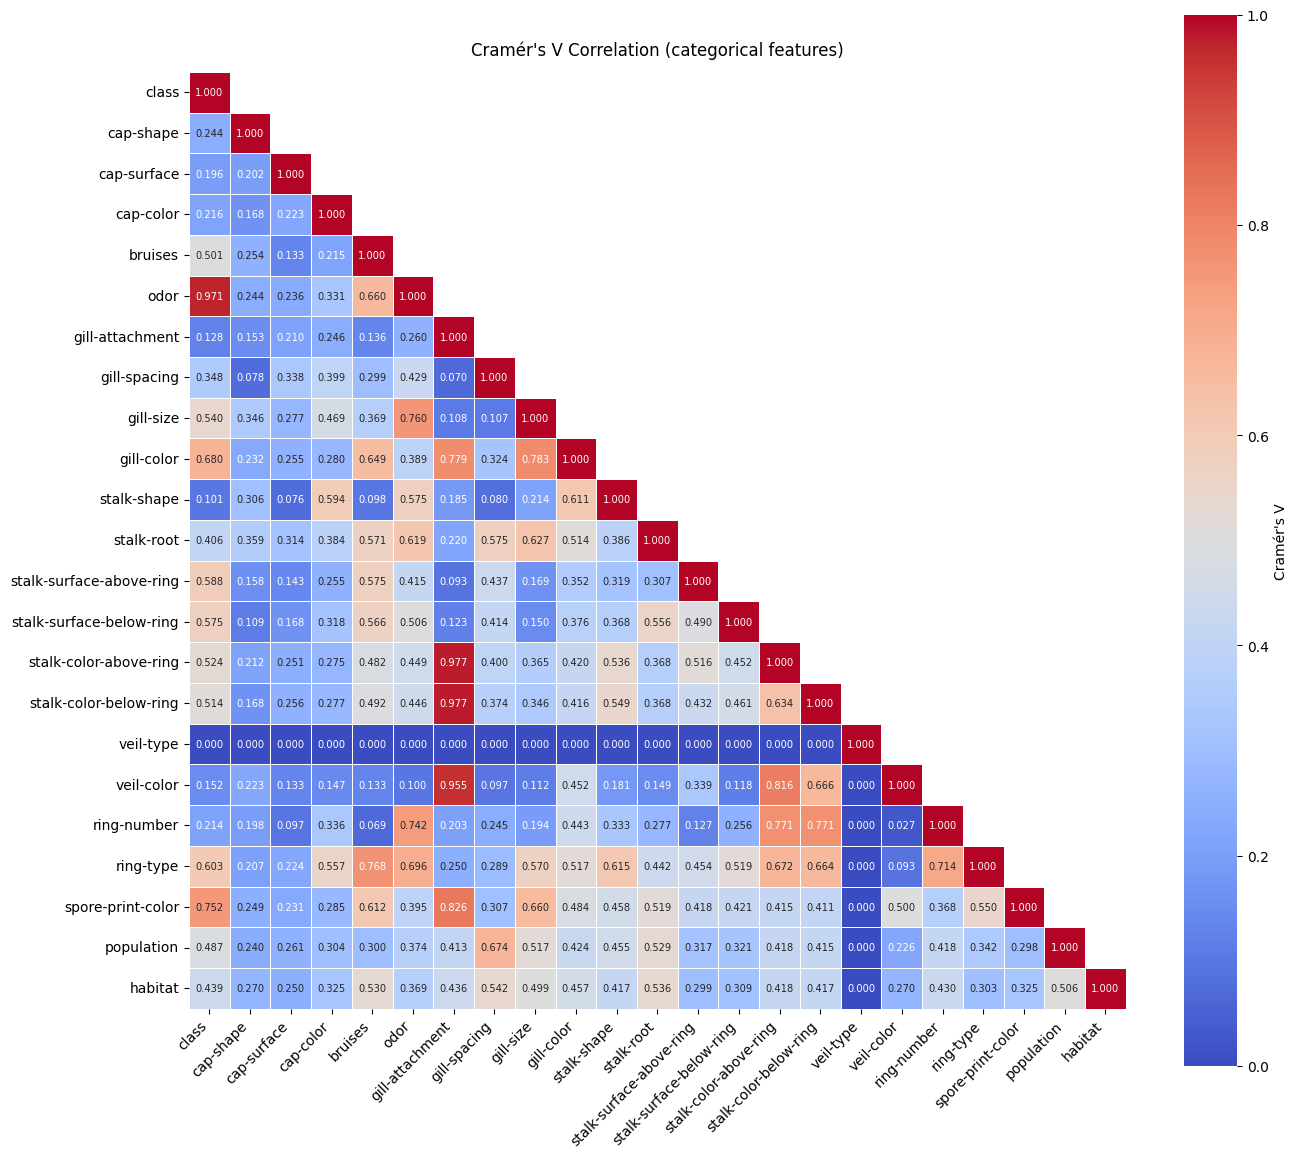

In [52]:
# include every categorical column + the target
corr = plot_categorical_corr(df, target_col="class")


## Checklist for Step 3

 - ✅ Reviewed distributions for all features

 - ✅ Checked balance for target variable

 - ✅ Compared correlation for features against the target variable

 - ✅ Compared correlation for features against features

 - ✅ Investigated outliers and anomalies

 - ✅ Wrote down initial hypotheses

# Step 4: Feature engineering FE

## Practical takeaway!!!!

- Tree models (XGBoost, LightGBM, RF, CatBoost) → no need to create manual interactions, they learn them.
   - A decision tree works by splitting features step by step.

   - Example with your mushroom data:

      - First split: odor == n → edible.

      - Otherwise: check gill-size == n → poisonous.

      - Otherwise: check gill-spacing == w → edible.

   - This process naturally creates interaction rules like:

      - "If odor is not n AND gill-size is n, then poisonous."

That’s effectively an interaction between odor and gill-size, but the model builds it itself from the data.
So you don’t have to manually create new “interaction columns” for tree models — they’re learned during training.

- Linear / shallow models → you must engineer interactions to capture non-linear rules.

## cap_shape
- Step 1: Group rare categories (b, s, c) → "Other".

- Step 2: Encode the cleaned feature.

- If using tree-based models (RandomForest, XGBoost, LightGBM) → simple one-hot encoding is enough.

- If using linear/logistic regression → target encoding is better.

- Step 3 (optional): Create an indicator flag for categories that are strongly poisonous-only (s) so the model doesn’t miss that rare but important signal.

## cap_surface
- Collapse g → "Other" or drop.

- Keep the three main categories.

- Encode depending on model type (One-hot for trees, target/freq for linear).

## cap-color
- Keep n, g, e, y, w  as-is.

- Group rare ones (b, c, r, u, p) → "Other".

- Encode with one-hot (trees) or target/freq encoding (linear).

- create flag for categories that are strongly edible or poisonous.

## bruises
- Definitely keep bruises — it’s a top predictor.

- Encode as binary (0/1).

- For advanced feature engineering, consider pairing it with odor or gill features for interaction terms in non-tree models.

## Odor
- Keep odor as categorical — it’s the most predictive feature.

- If you want to reduce dimensionality, make a binary edible vs poisonous odor flag.

- In model training, beware: odor may dominate, making other features look less useful.

- For interpretable models, it’s worth checking SHAP/feature importance to confirm.

- For weak features (cap-shape, cap-color, cap-surface) → it’s okay to merge very rare groups into "Other".

- For strong features (odor, bruises, gill-color) → keep all categories, even rare ones, if they’re predictive.

## gill_attachment
Drop this feature

- Since it has weak correlation and low variance.

- Models will likely ignore it anyway.

Keep it merged

- If you want completeness, you could keep it as binary (f vs Other).

- But this won’t add much value.

Check interactions (optional)

- It’s possible gill-attachment interacts with another feature (like gill-spacing or gill-size).

- Alone, it’s weak, but interactions might matter in tree-based models.

Recommendation

- If you’re trying to reduce feature space → drop gill-attachment.

- If you want to keep everything and let tree models decide → keep but merge a into "Other".

>we can check correlation between this feature and
`spore print color`
`veil_color`
`stalk_color_below_ring`
`stalk_color_above_ring`
`gill_color`

## gill_spacing
- Definitely keep gill-spacing — it has moderate predictive strength.

- Encode simply as binary (c=0, w=1).

- If optimizing feature space, no merging needed (already only 2 categories).

## gill_size
- Definitely keep gill-size.

- Encode it simply as binary (b=0, n=1).

- Consider checking interaction with gill-spacing for added boost in simpler models.

## gill_color
- Keep gill-color as categorical.

- Only group tiny/noisy categories into "Other".

- For tree models: one-hot encoding is sufficient.

- For linear models: consider target encoding.

## Outcome
we dont need to continue from here what we know is that:
1. we will use tree based models which will be able to understand the patterns between features and interactions between them so we dont need to create any interaction feature
2. we will do onehot encoding, in some cases we merge small groups which are like noises into groups called others, we will add flag for those groups which are 100 percent edible or poisonous
3. we keep both raw features and also these engineered features together and wont drop anything for now since model can decide which features are important and correlate more towards target
4. if 2 groups we do binary encoding if more onehot encoding

## only poisonous-only edible flag for each feature group

In [56]:
import pandas as pd

def add_class_exclusive_flags(df, target_col="class"):
    """
    For each categorical feature (except target), add two row-level flags:
      <col>_is_only_poisonous = 1 if THIS row's category is exclusive to poisonous
      <col>_is_only_edible    = 1 if THIS row's category is exclusive to edible
    Otherwise both = 0.
    """
    df_out = df.copy()
    features = [c for c in df.columns if c != target_col]

    for col in features:
        # build category -> class counts
        ct = pd.crosstab(df[col], df[target_col])

        # ensure both classes exist
        if "e" not in ct.columns: ct["e"] = 0
        if "p" not in ct.columns: ct["p"] = 0

        # which categories are exclusive?
        only_p = set(ct.index[(ct["e"] == 0) & (ct["p"] > 0)])
        only_e = set(ct.index[(ct["p"] == 0) & (ct["e"] > 0)])

        # assign row-wise flags
        df_out[f"{col}_is_only_poisonous"] = df[col].isin(only_p).astype("int8")
        df_out[f"{col}_is_only_edible"]    = df[col].isin(only_e).astype("int8")

    return df_out


In [57]:
df_new = add_class_exclusive_flags(df, target_col="class")

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s            

In [58]:
df_new.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  cap-shape_is_only_poisonous  \
0                 k          s       u                            0   
1                 n          n       g                            0   
2                 n          n       m                            0   
3                 k          s       u                            0   
4                 n          a       g                            0   

   cap-shape_is_only_edible  cap-surface_is_only_poisonous  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   cap-surface_is_only_edible  cap-color_is_only_poisonous  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   cap-color_is_only_edible  bruises_is_only_poisonous  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   bruises_is_only_edible  odor_is_only_poisonous  odor_is_only_edible  \
0                       0                       1                    0   
1                       0                       0                    1   
2                       0                       0                    1   
3                       0                       1                    0   
4                       0                       0                    0   

   gill-attachment_is_only_poisonous  gill-attachment_is_only_edible  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0         

In [59]:
df_new.shape

(8124, 67)

## Putting small groups under `others`

we do it only if for that feature we have at least 2 groups with less than 5% of total amount

In [60]:
def add_others_per_feature(
    df: pd.DataFrame,
    target_col: str = "class",
    threshold: float = 0.05,          # 5%
    require_at_least: int = 2,        # only group if >= this many rare cats (set to 1 to always group)
    suffix: str = "_others"
):
    """
    For each categorical feature except `target_col`, create <col><suffix> where
    categories with frequency < `threshold` are mapped to "Other".
    If the number of rare categories is less than `require_at_least`, copy the column unchanged.
    Returns: (new_df, rare_map) where rare_map[col] = set of categories mapped to "Other".
    """
    df_out = df.copy()
    cat_cols = [c for c in df.select_dtypes(include="object").columns if c != target_col]
    rare_map = {}

    for col in cat_cols:
        s = df[col]
        freq = s.dropna().value_counts(normalize=True)
        rare = set(freq[freq < threshold].index)

        if len(rare) >= require_at_least:
            df_out[col + suffix] = s.where(~s.isin(rare), "Other")
            rare_map[col] = rare
        else:
            df_out[col + suffix] = s.copy()  # keep schema consistent

    return df_out, rare_map


In [63]:
df2, rare = add_others_per_feature(df, target_col="class", threshold=0.05, require_at_least=2)



In [64]:
df2.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat cap-shape_others cap-surface_others  \
0                 k          s       u                x                  s   
1                 n          n       g                x                  s   
2                 n          n       m                b                  s   
3                 k          s       u                x                  y   
4                 n          a       g                x                  s   

  cap-color_others bruises_others odor_others gill-attachment_others  \
0                n              t       Other                      f   
1                y              t       Other                      f   
2                w              t       Other                      f   
3                w              t       Other                      f   
4                g              f           n                      f   

  gill-spacing_others gill-size_others gill-color_others stalk-shape_others  \
0                   c                n                 k                  e   
1                   c                b                 k                  e   
2                   c                b                 n                  e   
3                   c                n                 n                  e   
4                   w                b                 k                  t   

  stalk-root_others stalk-surface-above-ring_others  \
0                 e                               s   
1                 c                               s   
2                 c                               s   
3                 e                               s   
4                 e                               s   

  stalk-surface-below-ring_others stalk-color-above-ring_others  \
0                               s                             w   
1                               s                             w   
2                               s                             w   
3                               s                             w   
4                               s                             w   

  stalk-color-below-ring_others veil-type_others veil-color_others  \
0                             w                p                 w   
1                             w                p 

## Checklist for Step 4

- ✅ checked all features being categorical

- ✅ feature categories with being only poisonous or edible are labled

- ✅ those features that have at least 2 catgeories with less than 5 percent of total amount are combined and merged under a group so called other

- ✅ Onehot encoding and droping veil_type since its constant will take place in next step

# Step 5: baseline modeling

## XGBoost, LightGBM, HistGB

In [65]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

SEED = 42
TARGET = "class"

df = df2.copy()
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(str)
y_num = (y == 'p').astype(int)  # for XGB only

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=SEED)
X_val,   X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED)

cat_cols = X_train.select_dtypes(include="object").columns.tolist()
preprocess = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False), cat_cols)],
    remainder="drop"
)

models = {
    "HistGB": HistGradientBoostingClassifier(random_state=SEED),
}

try:
    from lightgbm import LGBMClassifier
    models["LightGBM"] = LGBMClassifier(random_state=SEED, n_estimators=500, learning_rate=0.05)
except:
    pass

try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(
        random_state=SEED, n_estimators=500, learning_rate=0.05,
        max_depth=6, subsample=0.9, colsample_bytree=0.9, eval_metric="logloss", tree_method="hist"
    )
except:
    pass

def evaluate(model_name, clf, X_tr, y_tr, X_v, y_v, X_te, y_te, pos_label):
    pipe = Pipeline([("pre", preprocess), ("model", clf)])
    pipe.fit(X_tr, y_tr)
    def one_split(name, X_, y_):
        yhat = pipe.predict(X_)
        proba = pipe.predict_proba(X_)[:, 1] if hasattr(pipe.named_steps["model"], "predict_proba") else None
        res = dict(split=name,
                   acc=accuracy_score(y_, yhat),
                   prec=precision_score(y_, yhat, pos_label=pos_label, zero_division=0),
                   rec=recall_score(y_, yhat, pos_label=pos_label, zero_division=0),
                   f1=f1_score(y_, yhat, pos_label=pos_label, zero_division=0),
                   roc_auc=(roc_auc_score((y_==pos_label).astype(int), proba) if proba is not None else np.nan))
        return res
    return pd.DataFrame([one_split("val", X_v, y_v), one_split("test", X_te, y_te)],
                        index=[f"{model_name}-val", f"{model_name}-test"])

results = []
for name, model in models.items():
    if name == "XGBoost":
        # use numeric labels (0/1) for XGB
        res = evaluate(name, model,
                       X_train, y_num.loc[y_train.index],
                       X_val,   y_num.loc[y_val.index],
                       X_test,  y_num.loc[y_test.index],
                       pos_label=1)
    else:
        res = evaluate(name, model, X_train, y_train, X_val, y_val, X_test, y_test, pos_label='p')
    results.append(res)

report = pd.concat(results)
print(report.round(4))


[LightGBM] [Info] Number of positive: 2741, number of negative: 2945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482061 -> initscore=-0.071786
[LightGBM] [Info] Start training from score -0.071786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              split  acc  prec  rec   f1  roc_auc
HistGB-val      val  1.0   1.0  1.0  1.0      1.0
HistGB-test    test  1.0   1.0  1.0  1.0      1.0
LightGBM-val    val  1.0   1.0  1.0  1.0      1.0
LightGBM-test  test  1.0   1.0  1.0  1.0      1.0
XGBoost-val     val  1.0   1.0  1.0  1.0      1.0
XGBoost-test   test  1.0   1.0  1.0  1.0      1.0


it can be the case models are great at finding patterns in this data set but main issue after my research is that we did feature engineering on a data set which we splitted later
so what we will do is trying again from scratch and first spliting and then engineering

## Checking data leakage

In [75]:
df = read_csv("/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv")

data set is successfully imported from/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv

your data set shape is

(8124, 23)


Accuracy:  0.9895
Precision: 1.0000
Recall:    0.9783
F1 Score:  0.9890
ROC AUC:   0.9996


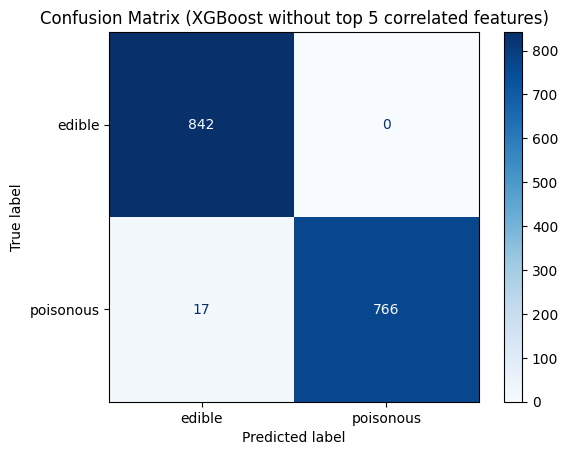

In [79]:
# === Imports (if not already in the notebook)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# === Drop top 5 correlated with class
cols_to_drop = ["odor", "spore-print-color", "gill-color", "gill-size", "bruises",
    "stalk-color-below-ring", "population", "stalk-root", "gill-spacing", "cap-shape"]
TARGET = "class"

X = df.drop(columns=[TARGET] + cols_to_drop)
y = (df[TARGET] == 'p').astype(int)

# === Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Preprocessing
cat_cols = X.select_dtypes(include="object").columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False), cat_cols)
    ],
    remainder="passthrough"
)

# === XGBoost Model
model = XGBClassifier(
    random_state=42,
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    tree_method="hist"
)

# === Pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

# === Train
pipe.fit(X_train, y_train)

# === Evaluate
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_proba)

# === Print Results
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}")

# === Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["edible", "poisonous"], cmap="Blues")
plt.title("Confusion Matrix (XGBoost without top 5 correlated features)")
plt.show()


it doesnt seem we are overfitting the model its more like our tree model found the paterns perfectly and now is so generalized that can achive 100% perfomance

we will continue with cv

## Cross Validation

In [98]:
df3 = read_csv("/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv")

data set is successfully imported from/content/drive/MyDrive/ML Projects/Mushroom-Classification/data/mushrooms.csv

your data set shape is

(8124, 23)


In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

# === Config
TARGET = "class"
SEED = 42

# === Load your data
df = df3.copy()  # Make sure df3 is defined with your dataset

# === Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df[TARGET], random_state=SEED)

# === Split features and labels
X_train = train_df.drop(columns=[TARGET])
y_train = (train_df[TARGET] == 'p').astype(int)

X_test = test_df.drop(columns=[TARGET])
y_test = (test_df[TARGET] == 'p').astype(int)

# === Preprocessing (OneHotEncoder for categorical columns)
categorical_features = X_train.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

# === XGBoost Model
model = XGBClassifier(
    random_state=SEED,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    tree_method="hist"
)

# === Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

# === Fit on Train
pipeline.fit(X_train, y_train)

# === Predict on Test
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# === Evaluate
print("=== Test Set Metrics ===")
print(f"Accuracy   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score   : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC    : {roc_auc_score(y_test, y_prob):.4f}")


=== Test Set Metrics ===
Accuracy   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
F1 Score   : 1.0000
ROC AUC    : 1.0000


since im still concerned if our data is leaked in a way, even though we splitted our test and train data even before feature engineering but I will give it another try and I will use other models like linear models maybe they fail

In [102]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# === Config
TARGET = "class"
SEED = 42

# === Load your data
df = df3.copy()  # Make sure df3 is defined with your dataset

# === Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df[TARGET], random_state=SEED)

# === Split features and labels
X_train = train_df.drop(columns=[TARGET])
y_train = (train_df[TARGET] == 'p').astype(int)

X_test = test_df.drop(columns=[TARGET])
y_test = (test_df[TARGET] == 'p').astype(int)

# === Preprocessing (OneHotEncoder for categorical columns)
categorical_features = X_train.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

# === Define all models
models = {
    "XGBoost": XGBClassifier(
        random_state=SEED,
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        tree_method="hist"
    ),
    "Random Forest": RandomForestClassifier(
        random_state=SEED,
        n_estimators=100,
        max_depth=None,
        class_weight="balanced"
    ),
    "Logistic Regression": LogisticRegression(
        random_state=SEED,
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    )
}

# === Train, Predict, Evaluate each model
for name, model in models.items():
    print(f"\n=== Model: {name} ===")

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    print(f"Accuracy   : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision  : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall     : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score   : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC    : {roc_auc_score(y_test, y_prob):.4f}")




=== Model: XGBoost ===
Accuracy   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
F1 Score   : 1.0000
ROC AUC    : 1.0000

=== Model: Random Forest ===
Accuracy   : 1.0000
Precision  : 1.0000
Recall     : 1.0000
F1 Score   : 1.0000
ROC AUC    : 1.0000

=== Model: Logistic Regression ===
Accuracy   : 0.9994
Precision  : 1.0000
Recall     : 0.9987
F1 Score   : 0.9994
ROC AUC    : 1.0000


yes logistic reagression is failing so it seems mushroom data set has so many signals and high correlations and groupings that our base model even could achive 100 percent of all metrics